# PVP Leaderboard - Descriptive Analysis
**Dataset**: 1,500 anonymized player entries  
**Category**: PVP (Player vs Player)  
**Focus**: Combat stats, kill/death patterns, arrow accuracy

In [13]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Load data
df = pd.read_parquet('../data/processed/leaderboard_full.parquet')
pvp = df[df['category'] == 'pvp'].copy()

# Calculate derived metrics
pvp['kd_ratio'] = (pvp['kills'] / pvp['deaths']).replace([np.inf, -np.inf], np.nan)
pvp['arrow_accuracy'] = (pvp['arrows_hit'] / pvp['arrows_shot'] * 100).replace([np.inf, -np.inf], np.nan)

print(f"Loaded {len(pvp):,} players")
pvp.head()

Loaded 5,100 players


,category,player_id,position,matches,wins,losses,wl_ratio,ties,kills,deaths,killstreak,damage_dealt,arrows_shot,arrows_hit,kd_ratio,arrow_accuracy
5000,pvp,player_26d584629d48,#1,NaN,NaN,NaN,NaN,NaN,161437.0,91769.0,72.0,137.0,405286.0,141253.0,1.759167,34.852672
5001,pvp,player_166e579b149f,#2,NaN,NaN,NaN,NaN,NaN,153854.0,98974.0,63.0,160.0,999757.0,476548.0,1.554489,47.666383
5002,pvp,player_c82cbd8215d7,#3,NaN,NaN,NaN,NaN,NaN,133982.0,60398.0,64.0,123.0,437974.0,398189.0,2.218318,90.916127
5003,pvp,player_8cbc07752f34,#4,NaN,NaN,NaN,NaN,NaN,106417.0,125867.0,53.0,91.0,807073.0,239413.0,0.845472,29.664355
5004,pvp,player_ceee959e9253,#5,NaN,NaN,NaN,NaN,NaN,106063.0,70075.0,132.0,82.5,242203.0,129530.0,1.513564,53.479932


## 1. Distribution of Kills

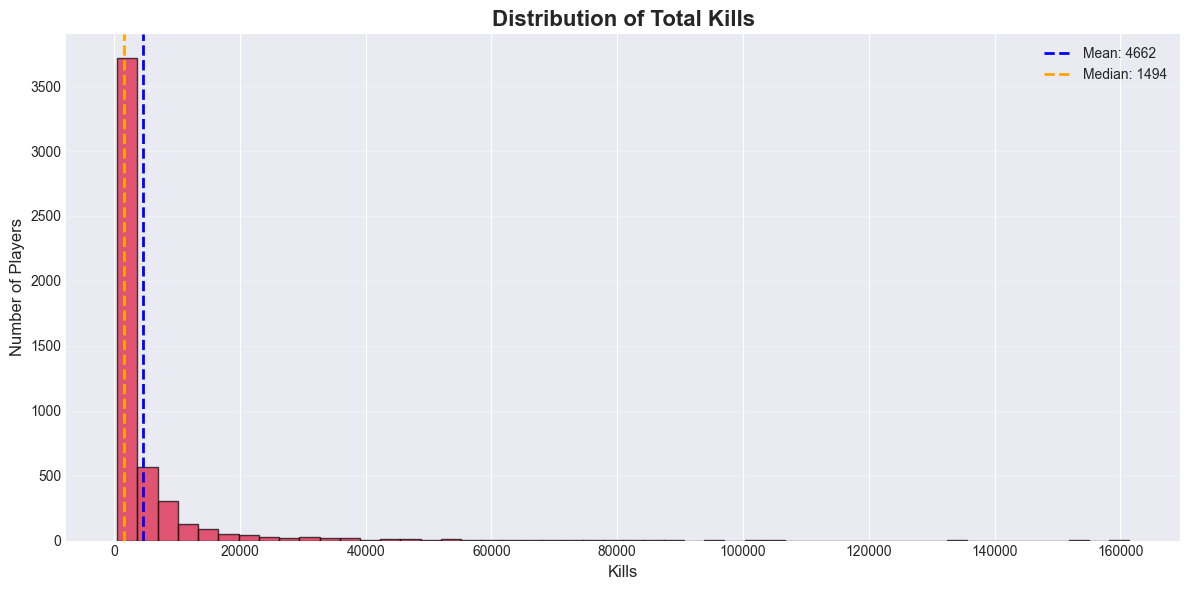

Mean Kills: 4661.91
Median Kills: 1493.50
Max Kills: 161,437.0


In [14]:
plt.figure(figsize=(12, 6))
plt.hist(pvp['kills'], bins=50, alpha=0.7, color='crimson', edgecolor='black')
plt.axvline(pvp['kills'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {pvp["kills"].mean():.0f}')
plt.axvline(pvp['kills'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {pvp["kills"].median():.0f}')
plt.title('Distribution of Total Kills', fontsize=16, fontweight='bold')
plt.xlabel('Kills', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Mean Kills: {pvp['kills'].mean():.2f}")
print(f"Median Kills: {pvp['kills'].median():.2f}")
print(f"Max Kills: {pvp['kills'].max():,}")

## 2. K/D Ratio Distribution

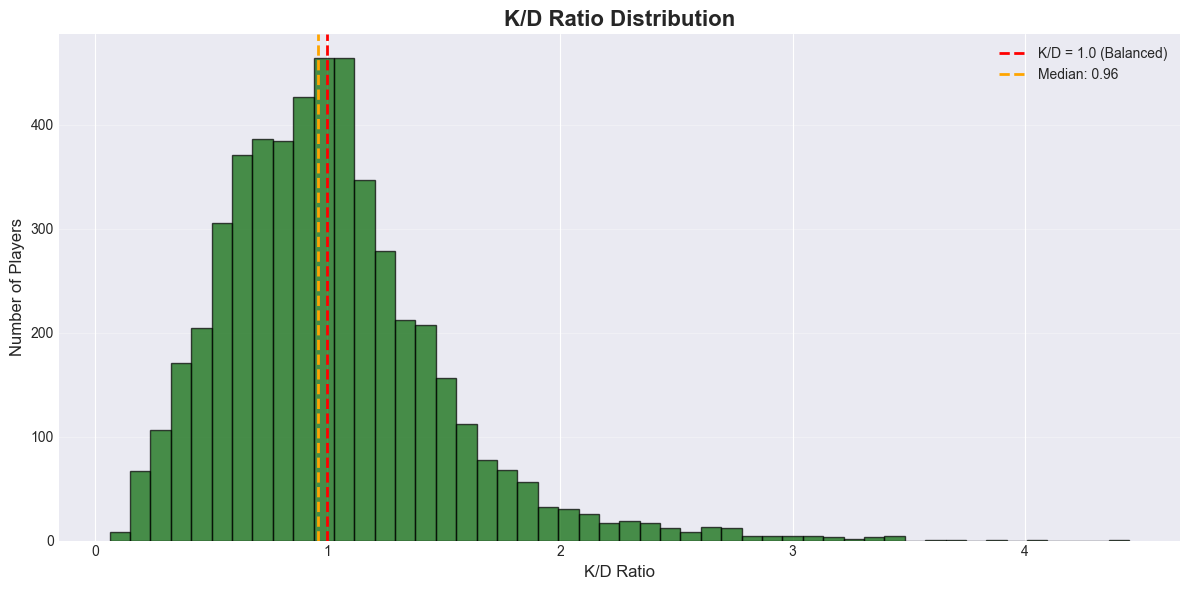

Average K/D: 1.021
Players with K/D > 1.0: 2344 (46.0%)


In [15]:
# Remove extreme outliers for better visualization
kd_clean = pvp['kd_ratio'][pvp['kd_ratio'] < 5].dropna()

plt.figure(figsize=(12, 6))
plt.hist(kd_clean, bins=50, alpha=0.7, color='darkgreen', edgecolor='black')
plt.axvline(1.0, color='red', linestyle='--', linewidth=2, label='K/D = 1.0 (Balanced)')
plt.axvline(kd_clean.median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {kd_clean.median():.2f}')
plt.title('K/D Ratio Distribution', fontsize=16, fontweight='bold')
plt.xlabel('K/D Ratio', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Average K/D: {pvp['kd_ratio'].mean():.3f}")
print(f"Players with K/D > 1.0: {(pvp['kd_ratio'] > 1.0).sum()} ({(pvp['kd_ratio'] > 1.0).mean()*100:.1f}%)")

## 3. Kills vs Deaths Scatter + Regression

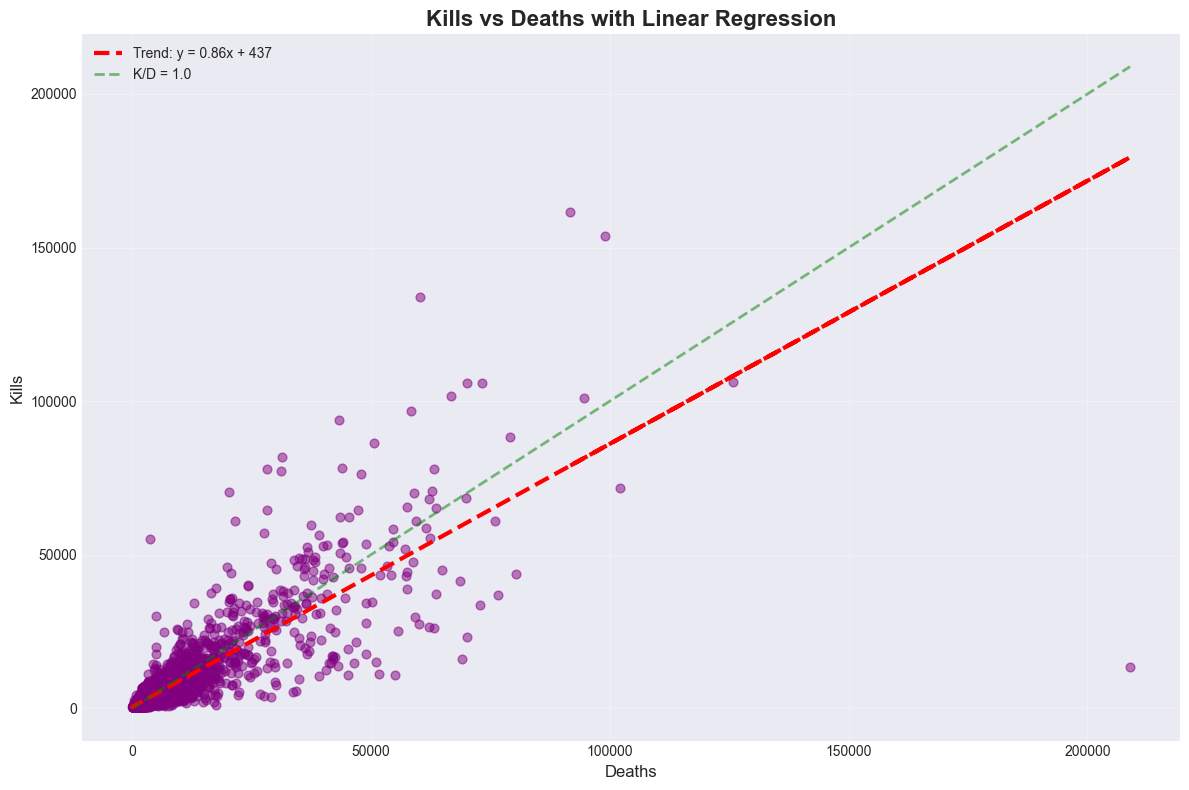

Correlation: 0.838


In [16]:
plt.figure(figsize=(12, 8))
plt.scatter(pvp['deaths'], pvp['kills'], alpha=0.5, s=40, c='purple')

# Linear regression
z = np.polyfit(pvp['deaths'], pvp['kills'], 1)
p = np.poly1d(z)
plt.plot(pvp['deaths'], p(pvp['deaths']), "r--", linewidth=3, label=f'Trend: y = {z[0]:.2f}x + {z[1]:.0f}')

# 1:1 line
max_val = max(pvp['deaths'].max(), pvp['kills'].max())
plt.plot([0, max_val], [0, max_val], 'g--', linewidth=2, alpha=0.5, label='K/D = 1.0')

plt.title('Kills vs Deaths with Linear Regression', fontsize=16, fontweight='bold')
plt.xlabel('Deaths', fontsize=12)
plt.ylabel('Kills', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

corr = pvp[['kills', 'deaths']].corr().iloc[0, 1]
print(f"Correlation: {corr:.3f}")

## 4. Arrow Accuracy Distribution

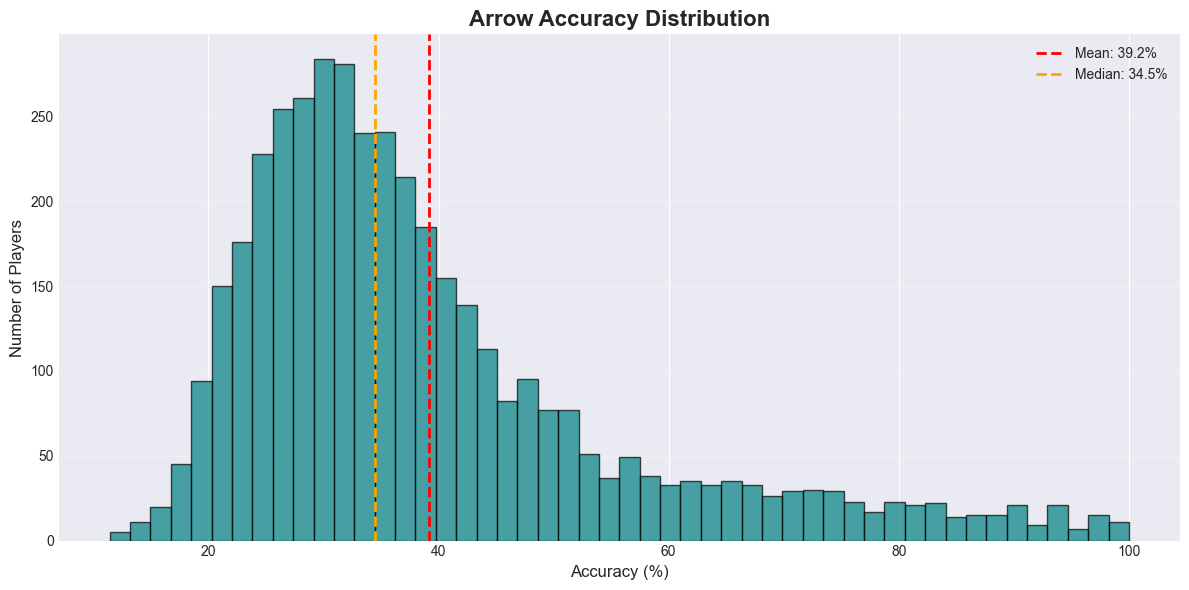

Average Accuracy: 39.17%
Players with >50% accuracy: 785


In [17]:
# Remove extreme outliers
acc_clean = pvp['arrow_accuracy'][pvp['arrow_accuracy'] <= 100].dropna()

plt.figure(figsize=(12, 6))
plt.hist(acc_clean, bins=50, alpha=0.7, color='teal', edgecolor='black')
plt.axvline(acc_clean.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {acc_clean.mean():.1f}%')
plt.axvline(acc_clean.median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {acc_clean.median():.1f}%')
plt.title('Arrow Accuracy Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Accuracy (%)', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Average Accuracy: {acc_clean.mean():.2f}%")
print(f"Players with >50% accuracy: {(acc_clean > 50).sum()}")

## 5. Arrows Shot vs Arrows Hit

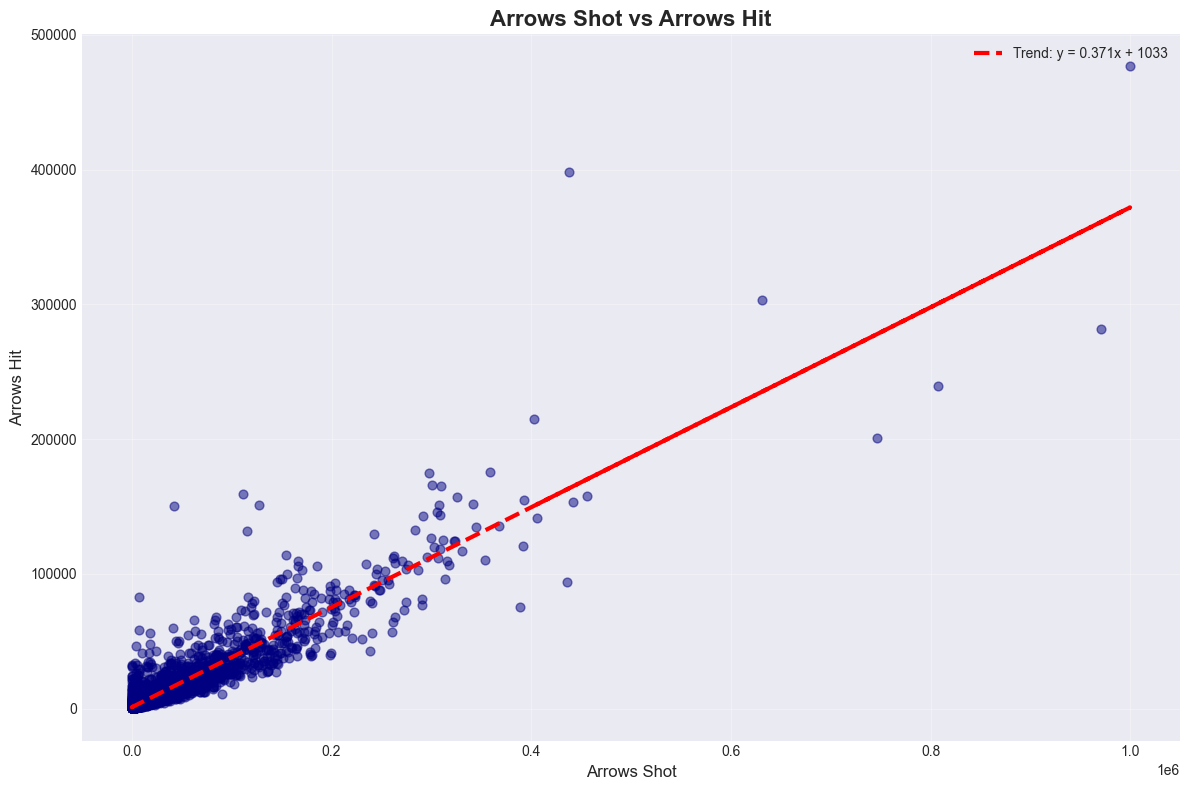

Correlation: 0.920
Average accuracy from slope: 37.1%


In [18]:
plt.figure(figsize=(12, 8))
plt.scatter(pvp['arrows_shot'], pvp['arrows_hit'], alpha=0.5, s=40, c='navy')

# Regression
z = np.polyfit(pvp['arrows_shot'], pvp['arrows_hit'], 1)
p = np.poly1d(z)
plt.plot(pvp['arrows_shot'], p(pvp['arrows_shot']), "r--", linewidth=3, label=f'Trend: y = {z[0]:.3f}x + {z[1]:.0f}')

plt.title('Arrows Shot vs Arrows Hit', fontsize=16, fontweight='bold')
plt.xlabel('Arrows Shot', fontsize=12)
plt.ylabel('Arrows Hit', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

corr = pvp[['arrows_shot', 'arrows_hit']].corr().iloc[0, 1]
print(f"Correlation: {corr:.3f}")
print(f"Average accuracy from slope: {z[0]*100:.1f}%")

## 6. Damage Dealt Distribution

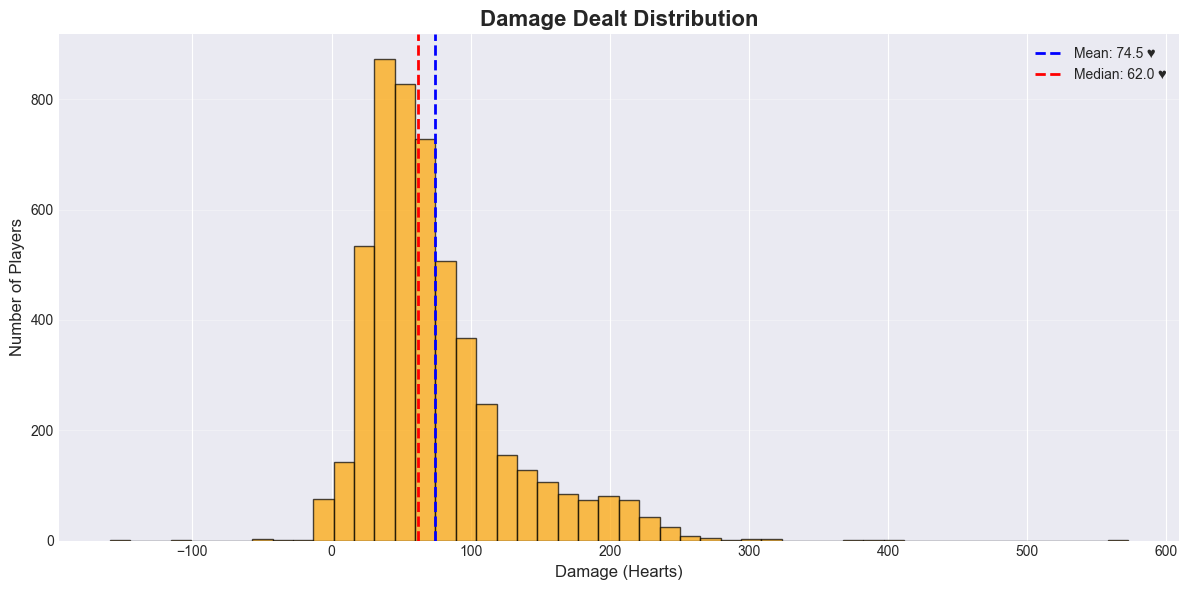

Total Damage Dealt: 379,988 ♥


In [19]:
plt.figure(figsize=(12, 6))
plt.hist(pvp['damage_dealt'], bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.axvline(pvp['damage_dealt'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {pvp["damage_dealt"].mean():.1f} ♥')
plt.axvline(pvp['damage_dealt'].median(), color='red', linestyle='--', linewidth=2, label=f'Median: {pvp["damage_dealt"].median():.1f} ♥')
plt.title('Damage Dealt Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Damage (Hearts)', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Total Damage Dealt: {pvp['damage_dealt'].sum():,.0f} ♥")

## 7. Correlation Heatmap

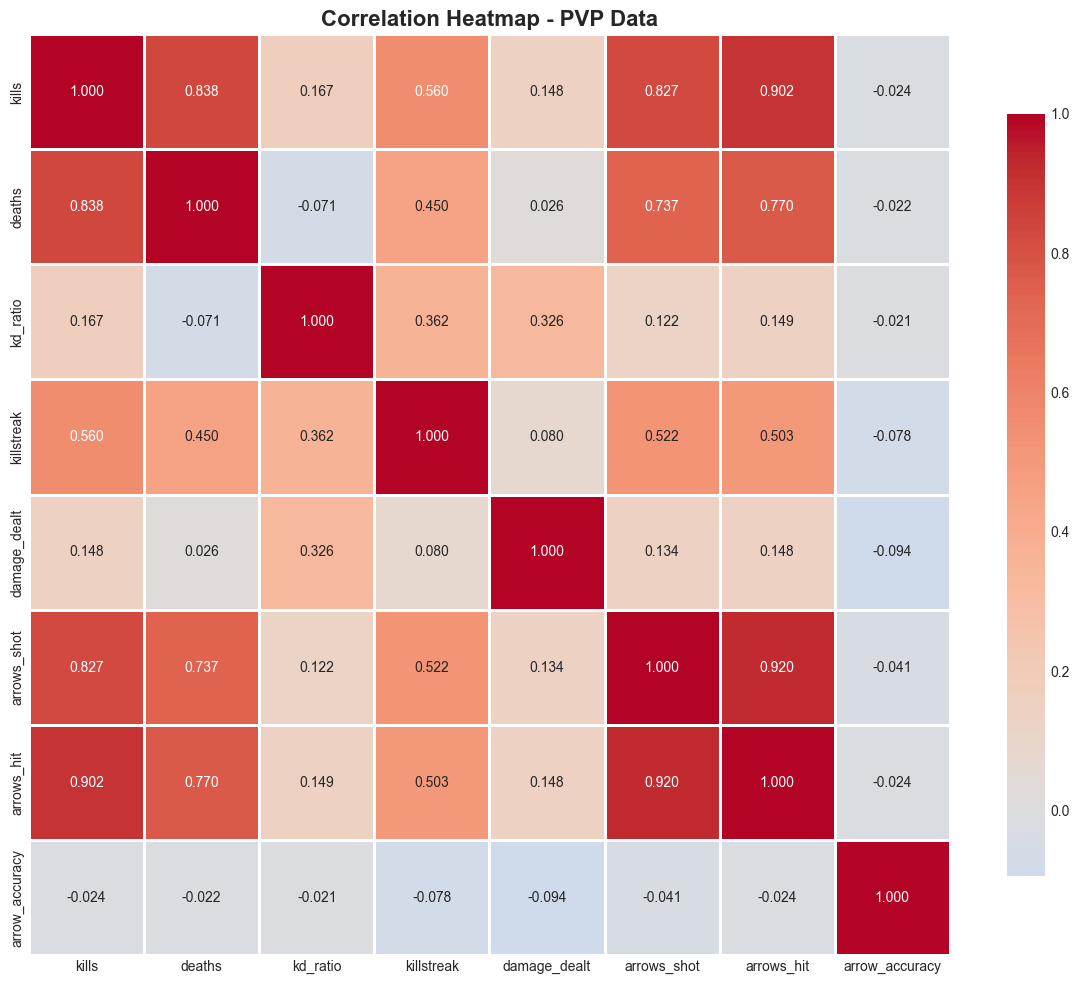


Strongest Correlations:
           var1         var2  correlation
25  arrows_shot   arrows_hit     0.919968
5         kills   arrows_hit     0.902146
0         kills       deaths     0.837680
4         kills  arrows_shot     0.827038
11       deaths   arrows_hit     0.770094


In [20]:
# Select numeric columns
numeric_cols = ['kills', 'deaths', 'kd_ratio', 'killstreak', 'damage_dealt', 'arrows_shot', 'arrows_hit', 'arrow_accuracy']
corr_matrix = pvp[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.3f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - PVP Data', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nStrongest Correlations:")
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_pairs.append({
            'var1': corr_matrix.columns[i],
            'var2': corr_matrix.columns[j],
            'correlation': corr_matrix.iloc[i, j]
        })
corr_df = pd.DataFrame(corr_pairs).sort_values('correlation', ascending=False, key=abs)
print(corr_df.head(5))

## 8. Top 20 Players by Kills

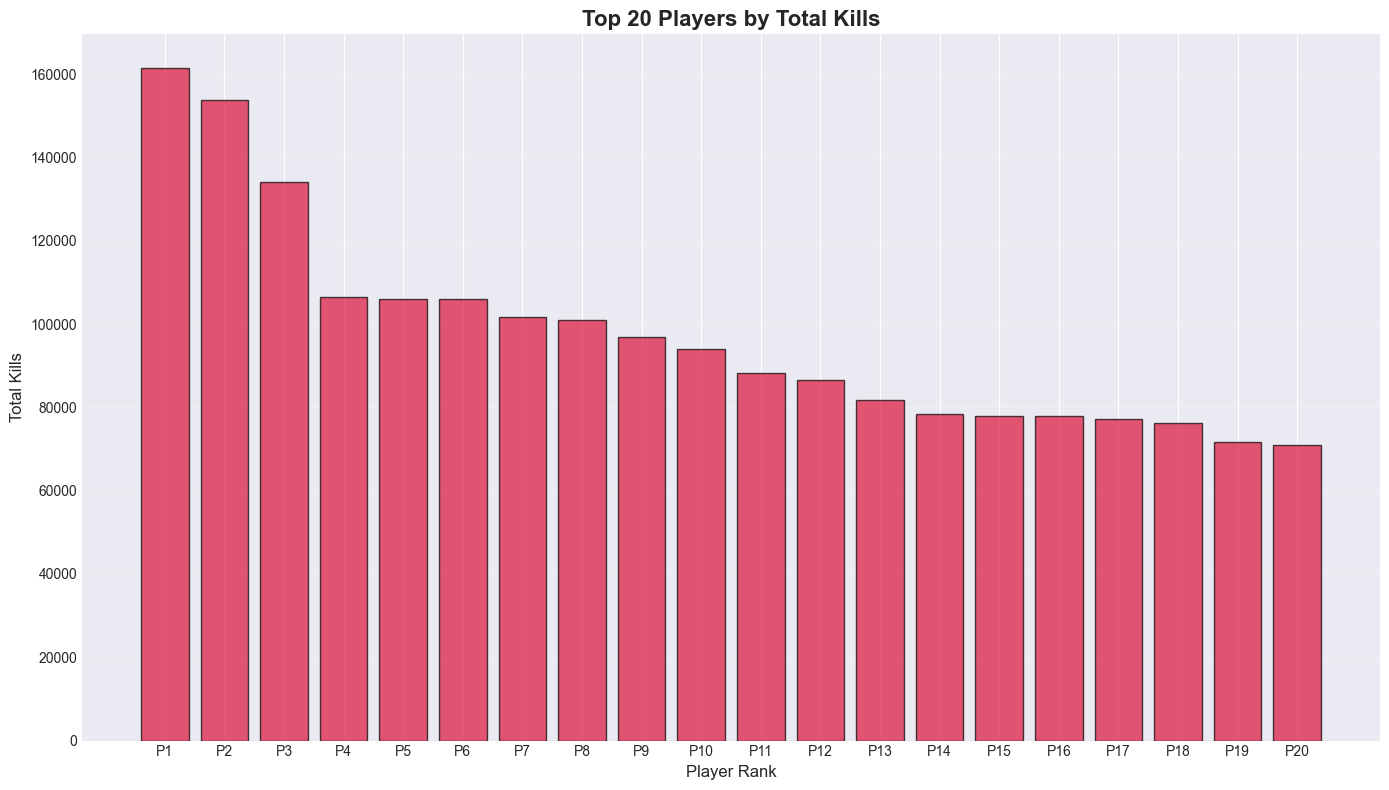

          player_id    kills   deaths  kd_ratio  killstreak
player_26d584629d48 161437.0  91769.0  1.759167        72.0
player_166e579b149f 153854.0  98974.0  1.554489        63.0
player_c82cbd8215d7 133982.0  60398.0  2.218318        64.0
player_8cbc07752f34 106417.0 125867.0  0.845472        53.0
player_ceee959e9253 106063.0  70075.0  1.513564       132.0
player_64f3fc9bf409 105979.0  73320.0  1.445431       157.0
player_7544568392f2 101617.0  66732.0  1.522763        71.0
player_fa540b30b08f 100900.0  94657.0  1.065954        63.0
player_971099e6273d  96906.0  58501.0  1.656485       140.0
player_16d4f71a7e71  94029.0  43328.0  2.170167        69.0
player_910764e5a178  88262.0  79202.0  1.114391        80.0
player_b15634e1cc31  86499.0  50664.0  1.707307       109.0
player_19dfbc998355  81778.0  31431.0  2.601826        35.0
player_f84c88090b0d  78357.0  43925.0  1.783882        42.0
player_8d876ad6cbb6  78038.0  28352.0  2.752469        55.0
player_eac3c77fab9e  77900.0  63176.0  1

In [21]:
top_20 = pvp.nlargest(20, 'kills')[['player_id', 'kills', 'deaths', 'kd_ratio', 'killstreak']]

plt.figure(figsize=(14, 8))
x = range(len(top_20))
plt.bar(x, top_20['kills'], alpha=0.7, color='crimson', edgecolor='black')
plt.xticks(x, [f"P{i+1}" for i in range(len(top_20))], rotation=0)
plt.title('Top 20 Players by Total Kills', fontsize=16, fontweight='bold')
plt.xlabel('Player Rank', fontsize=12)
plt.ylabel('Total Kills', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(top_20.to_string(index=False))

## 9. Killstreak Distribution

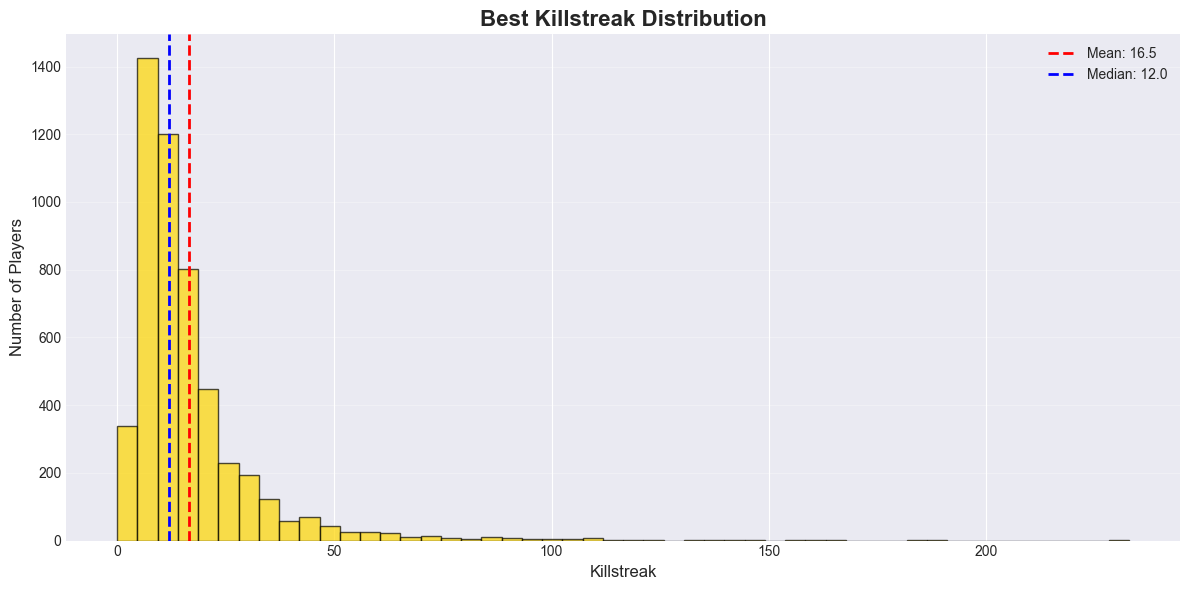

Max Killstreak: 233
Players with killstreak >50: 178


In [22]:
plt.figure(figsize=(12, 6))
plt.hist(pvp['killstreak'], bins=50, alpha=0.7, color='gold', edgecolor='black')
plt.axvline(pvp['killstreak'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {pvp["killstreak"].mean():.1f}')
plt.axvline(pvp['killstreak'].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {pvp["killstreak"].median():.1f}')
plt.title('Best Killstreak Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Killstreak', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Max Killstreak: {pvp['killstreak'].max():.0f}")
print(f"Players with killstreak >50: {(pvp['killstreak'] > 50).sum()}")

## 10. K/D Ratio vs Arrow Accuracy

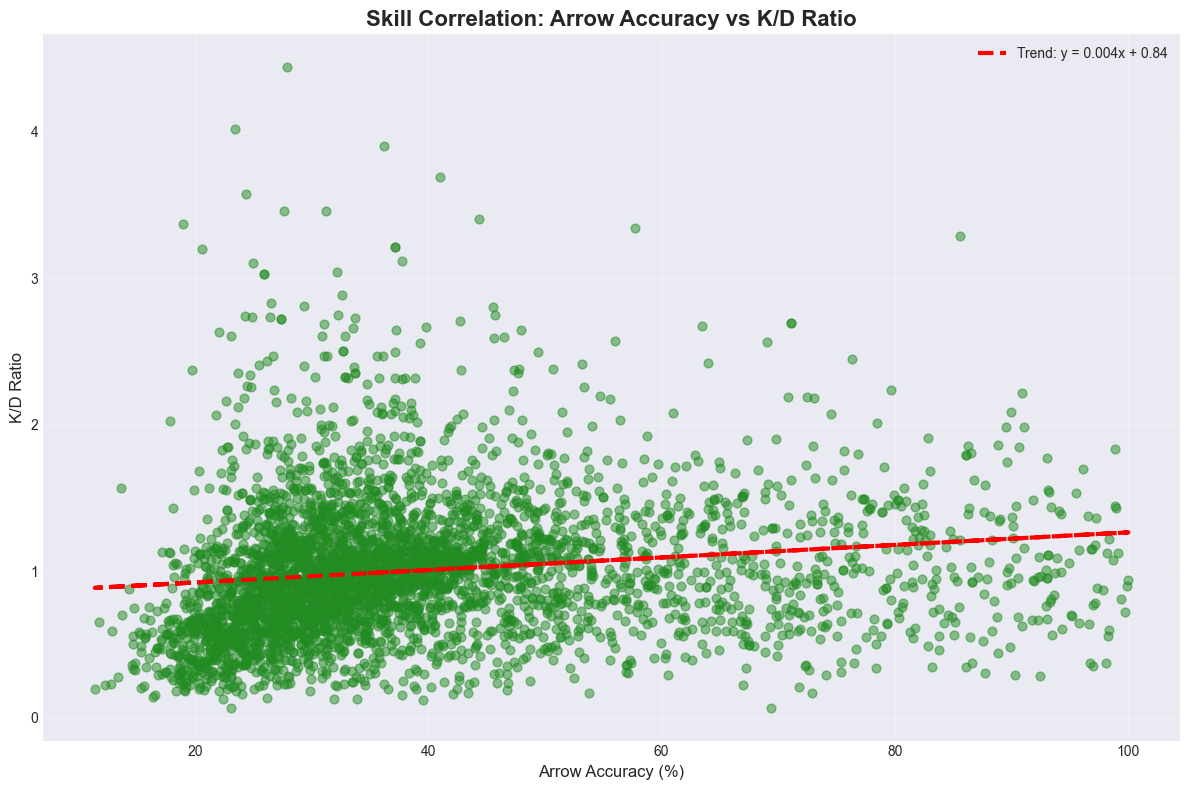

Correlation: 0.155
Interpretation: Positive correlation - better accuracy → better K/D


In [23]:
# Clean data
mask = (pvp['kd_ratio'] < 5) & (pvp['arrow_accuracy'] <= 100)
plot_data = pvp[mask].dropna(subset=['kd_ratio', 'arrow_accuracy'])

plt.figure(figsize=(12, 8))
plt.scatter(plot_data['arrow_accuracy'], plot_data['kd_ratio'], alpha=0.5, s=40, c='forestgreen')

# Trend line
z = np.polyfit(plot_data['arrow_accuracy'], plot_data['kd_ratio'], 1)
p = np.poly1d(z)
plt.plot(plot_data['arrow_accuracy'], p(plot_data['arrow_accuracy']), "r--", linewidth=3, 
         label=f'Trend: y = {z[0]:.3f}x + {z[1]:.2f}')

plt.title('Skill Correlation: Arrow Accuracy vs K/D Ratio', fontsize=16, fontweight='bold')
plt.xlabel('Arrow Accuracy (%)', fontsize=12)
plt.ylabel('K/D Ratio', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

corr = plot_data[['arrow_accuracy', 'kd_ratio']].corr().iloc[0, 1]
print(f"Correlation: {corr:.3f}")
print(f"Interpretation: {'Positive' if corr > 0 else 'Negative'} correlation - better accuracy {'→' if corr > 0 else '←'} better K/D")

## Summary Statistics

In [24]:
print("=" * 80)
print("COMPREHENSIVE PVP SUMMARY")
print("=" * 80)
print(f"\nTotal Players: {len(pvp):,}")
print(f"Total Kills: {pvp['kills'].sum():,}")
print(f"Total Deaths: {pvp['deaths'].sum():,}")
print(f"Total Arrows Shot: {pvp['arrows_shot'].sum():,}")
print(f"Total Arrows Hit: {pvp['arrows_hit'].sum():,}")
print(f"Total Damage Dealt: {pvp['damage_dealt'].sum():,.0f} ♥")
print(f"\nAverage K/D Ratio: {pvp['kd_ratio'].mean():.3f}")
print(f"Average Arrow Accuracy: {pvp['arrow_accuracy'].mean():.2f}%")
print(f"Average Killstreak: {pvp['killstreak'].mean():.1f}")
print("\nDetailed Statistics:")
print(pvp[['kills', 'deaths', 'kd_ratio', 'killstreak', 'damage_dealt', 'arrow_accuracy']].describe())
print("=" * 80)

COMPREHENSIVE PVP SUMMARY

Total Players: 5,100
Total Kills: 23,775,756.0
Total Deaths: 25,153,318.0
Total Arrows Shot: 131,886,815.0
Total Arrows Hit: 54,196,871.0
Total Damage Dealt: 379,988 ♥

Average K/D Ratio: 1.021
Average Arrow Accuracy: 582.06%
Average Killstreak: 16.5

Detailed Statistics:
               kills         deaths     kd_ratio   killstreak  damage_dealt  \
count    5100.000000    5100.000000  5100.000000  5100.000000   5100.000000   
mean     4661.912941    4932.023137     1.020601    16.478627     74.507451   
std      9898.455589    9679.985000     0.543650    16.342461     51.578773   
min       455.000000      65.000000     0.063880     0.000000   -159.500000   
25%       760.750000     879.000000     0.687478     8.000000     39.500000   
50%      1493.500000    1762.000000     0.959948    12.000000     62.000000   
75%      4131.750000    4689.000000     1.234123    19.000000     94.500000   
max    161437.000000  208924.000000    14.652371   233.000000    572